In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.interpolate import make_interp_spline, BSpline

In [33]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
data.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
data.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012  

In [36]:
print(data.groupby('Education').count())

              ID  Year_Birth  Marital_Status  Income  Kidhome  Teenhome  \
Education                                                                 
2n Cycle     203         203             203     200      203       203   
Basic         54          54              54      54       54        54   
Graduation  1127        1127            1127    1116     1127      1127   
Master       370         370             370     365      370       370   
PhD          486         486             486     481      486       486   

            Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
Education                                              ...                      
2n Cycle            203      203       203        203  ...                203   
Basic                54       54        54         54  ...                 54   
Graduation         1127     1127      1127       1127  ...               1127   
Master              370      370       370        370  ...           

In [37]:
#Z_CostContact, Z_Revenue has one unique value, so we will drop
print(data['Education'].unique())
print(data['Marital_Status'].unique())
print(data['Z_CostContact'].unique())
print(data['Z_Revenue'].unique())
print(data['Response'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
[3]
[11]
[1 0]


In [38]:
data['Age'] = 2021 - data.Year_Birth 
data.loc[data['Age'] > 78]
#We have 3 unrealistic ages range, so we will drop too

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,121
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,128
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,122
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,0,0,1,0,0,0,3,11,0,80
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,0,0,0,0,0,0,3,11,0,81


In [39]:
data = data[data.Age < 100] #Drop unrealistic ages
#Transform Dt_Customer in different atributes (Day, Month, Year)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Day'] = data['Dt_Customer'].dt.day
data['Month'] = data['Dt_Customer'].dt.month
data['Year'] = data['Dt_Customer'].dt.year
data = data.drop(['Dt_Customer'], axis=1)
data.head(2)

<ipython-input-39-56f0787a12d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
<ipython-input-39-56f0787a12d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Dt_Customer'].dt.day
<ipython-input-39-56f0787a12d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Day,Month,Year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,3,11,1,64,9,4,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,3,11,0,67,3,8,2014


In [40]:
#Transform number of kids, and teenagers (maximum is 2, to has kid or has teen (binary))
print(data['Kidhome'].unique())
print(data['Teenhome'].unique())
has_kid = {0 : 0, 1 : 1, 2: 1}
data['Kidhome'] = data.Kidhome.map(has_kid)
has_teen = {0 : 0, 1 : 1, 2: 1}
data['Teenhome'] = data.Teenhome.map(has_teen)
data.head(3)

[0 1 2]
[0 1 2]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Day,Month,Year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,3,11,1,64,9,4,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,3,11,0,67,3,8,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,3,11,0,56,21,8,2013


In [41]:
data.groupby('Marital_Status').count() #Verify cardinal of each class

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Day,Month,Year
Marital_Status,,,,,,,,,,,,,,,,,,,,,
Absurd,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Alone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Divorced,231,231,231,231,231,231,231,231,231,231,...,231,231,231,231,231,231,231,231,231,231
Married,864,864,864,857,864,864,864,864,864,864,...,864,864,864,864,864,864,864,864,864,864
Single,479,479,479,470,479,479,479,479,479,479,...,479,479,479,479,479,479,479,479,479,479
Together,579,579,579,572,579,579,579,579,579,579,...,579,579,579,579,579,579,579,579,579,579
Widow,77,77,77,76,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
YOLO,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [42]:
drop_status = ['Absurd', 'Alone', 'YOLO'] #Yolo have only 3, Alone 2 and Absurd 2, so we will drop
data = data[data.Marital_Status.isin(drop_status) == False]

In [43]:
#Applyng One hot encoding on Marital Status
one_hot_period = pd.get_dummies(data['Marital_Status'])
data = pd.concat([data, one_hot_period], axis=1)
data = data.drop(['Marital_Status'], axis=1)
data.head(3)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Age,Day,Month,Year,Divorced,Married,Single,Together,Widow
0,5524,1957,Graduation,58138.0,0,0,58,635,88,546,...,1,64,9,4,2012,0,0,1,0,0
1,2174,1954,Graduation,46344.0,1,1,38,11,1,6,...,0,67,3,8,2014,0,0,1,0,0
2,4141,1965,Graduation,71613.0,0,0,26,426,49,127,...,0,56,21,8,2013,0,0,0,1,0


In [44]:
#Ordinal Encoding in Education
education = {'Basic' : 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
data['Education_level'] = data.Education.map(education)
data = data.drop(['Education'], axis=1)
data.head(3)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Day,Month,Year,Divorced,Married,Single,Together,Widow,Education_level
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,64,9,4,2012,0,0,1,0,0,3
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,67,3,8,2014,0,0,1,0,0,3
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,56,21,8,2013,0,0,0,1,0,3


In [45]:
#Creating the attribute we will predict based on the sum of all product sales
purchases = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['total_purchase'] = data[purchases].sum(axis=1)
data.head(3)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Day,Month,Year,Divorced,Married,Single,Together,Widow,Education_level,total_purchase
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,9,4,2012,0,0,1,0,0,3,1617
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,3,8,2014,0,0,1,0,0,3,27
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,21,8,2013,0,0,0,1,0,3,776


In [46]:
#Drop columns ID, Z_CostContact and Z_Revenue 0 contribution, Year_Birth transform into Age
unwanted_columns = ['ID', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']
data = data.drop(unwanted_columns, axis=1)
data.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Day,Month,Year,Divorced,Married,Single,Together,Widow,Education_level,total_purchase
0,58138.0,0,0,58,635,88,546,172,88,88,...,9,4,2012,0,0,1,0,0,3,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,8,2014,0,0,1,0,0,3,27
2,71613.0,0,0,26,426,49,127,111,21,42,...,21,8,2013,0,0,0,1,0,3,776


In [47]:
#Drop columns that have used on creation of Total_Purchase
unwanted_columns2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']
data = data.drop(unwanted_columns2, axis=1)
data.head(3)

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Day,Month,Year,Divorced,Married,Single,Together,Widow,Education_level,total_purchase
0,58138.0,0,0,58,3,8,10,4,7,0,...,9,4,2012,0,0,1,0,0,3,1617
1,46344.0,1,1,38,2,1,1,2,5,0,...,3,8,2014,0,0,1,0,0,3,27
2,71613.0,0,0,26,1,8,2,10,4,0,...,21,8,2013,0,0,0,1,0,3,776


In [48]:
#data.info()

In [49]:
#Income have 24 null values, we will drop them
data = data.dropna()
data.head(3)

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Day,Month,Year,Divorced,Married,Single,Together,Widow,Education_level,total_purchase
0,58138.0,0,0,58,3,8,10,4,7,0,...,9,4,2012,0,0,1,0,0,3,1617
1,46344.0,1,1,38,2,1,1,2,5,0,...,3,8,2014,0,0,1,0,0,3,27
2,71613.0,0,0,26,1,8,2,10,4,0,...,21,8,2013,0,0,0,1,0,3,776


In [50]:
Q1=data['Income'].quantile(0.25)
Q3=data['Income'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
data = data[data['Income']< Upper_Whisker]

35208.5
68592.0
33383.5
-14866.75 118667.25


<AxesSubplot:xlabel='Income'>

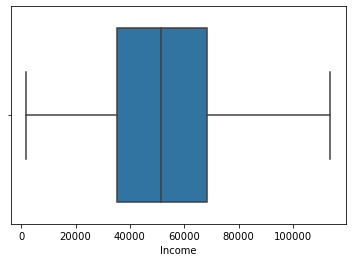

In [51]:
sns.boxplot(x=data['Income'])

In [52]:
#data.info()
#data.isna().any() dataset have 24 row with income values equal null

In [53]:
X = data.drop(["total_purchase"], axis=1)
X.head(2)

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Age,Day,Month,Year,Divorced,Married,Single,Together,Widow,Education_level
0,58138.0,0,0,58,3,8,10,4,7,0,...,64,9,4,2012,0,0,1,0,0,3
1,46344.0,1,1,38,2,1,1,2,5,0,...,67,3,8,2014,0,0,1,0,0,3


In [54]:
y = data['total_purchase'].to_frame()
y.head(3)

,total_purchase
0,1617
1,27
2,776


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [56]:
print("The Shape of X : %s, for x train : %s, for x test: %s" % (X.shape,X_train.shape, X_test.shape))
print("The Shape of y: %s, The Shape of y train : %s, The Shape of test y: %s" %(y.shape, y_train.shape, y_test.shape))

The Shape of X : (2198, 26), for x train : (1648, 26), for x test: (550, 26)
The Shape of y: (2198, 1), The Shape of y train : (1648, 1), The Shape of test y: (550, 1)


In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
clf = DecisionTreeRegressor(random_state=20210)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=20210)

In [59]:
predictions = clf.predict(X_test)
predictions

array([  94.,    8., 1345., 1228., 2092.,  770.,   54.,  486.,   20.,
        576.,   51.,  458.,  180., 2349.,   81., 1019.,  968., 1102.,
        126.,  140., 1853., 1371., 1130.,  860.,  587.,  126., 1282.,
        264., 1229.,   37.,  172., 2349.,  393., 1024., 1540., 1134.,
       1564.,  507.,  908., 1179.,  417.,  195.,  102.,  844.,  836.,
        630., 1870.,  119.,   87.,  943.,   47., 1576.,   60.,  424.,
       1366.,  299.,  145.,   44., 2089.,   32.,  236.,  459.,   78.,
        367.,  115.,  251.,  542.,   84., 1167.,  106.,  990.,   61.,
         84.,   46.,  101., 1392., 1049.,  874.,   81., 1440.,   44.,
         46., 1161.,  193.,  170.,   96.,  296., 1138., 1471.,  475.,
        265., 1456.,  392.,  971.,    8.,   38., 1213.,   68.,   20.,
         42.,  415.,   20., 1363.,  470.,  889.,  282.,  433.,  730.,
         52.,   79.,  382.,   46., 1044.,  973.,   72.,  100.,  494.,
       1323.,   63.,   81.,  315.,  836.,  874.,  868., 1073.,  115.,
        369., 1161.,

In [60]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)


141.06545454545454

In [61]:
mean_squared_error(y_test, predictions, squared= True)

73921.6

In [62]:
mean_squared_error(y_test, predictions, squared= False)

271.88526992097235

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
reg.feature_importances_

<ipython-input-63-d074d64156b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


array([2.86631719e-01, 1.30362585e-01, 2.86795015e-02, 7.31382428e-03,
       6.95305492e-03, 3.55051639e-02, 2.50817646e-01, 1.20770344e-01,
       1.29310464e-02, 4.18163430e-03, 5.57159215e-03, 4.29786815e-02,
       4.02911762e-03, 9.14886131e-04, 2.02278299e-04, 6.72860336e-03,
       6.63272068e-03, 6.24585641e-03, 5.82900206e-03, 1.50141622e-02,
       2.65525930e-03, 3.14271323e-03, 3.25538518e-03, 3.93980201e-03,
       1.85900398e-03, 6.85441803e-03])

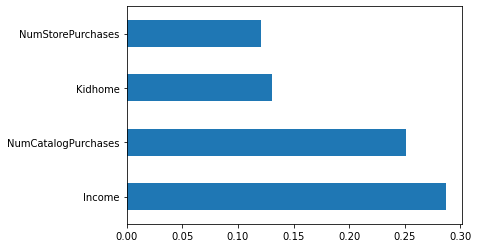

In [64]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [65]:
clf.score(X_train,y_train)


1.0

In [66]:
clf.score(X_test,y_test)


0.7874002853869142

In [67]:
print(data['Income'].max())
print(data['Income'].median())
print(data['Income'].min())

113734.0
51301.0
1730.0


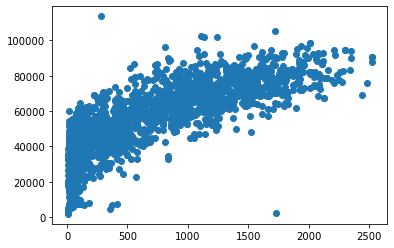

In [68]:
plt.scatter(data['total_purchase'],data['Income'])

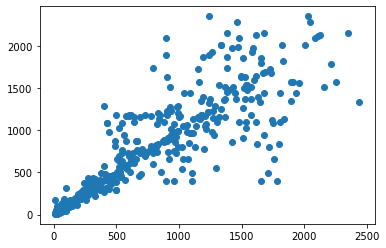

In [69]:
#sns.distplot(y_test-predictions)
plt.scatter(y_test,predictions)


Tunning do Modelo

In [70]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [71]:
#I took the best parameters and commented that cell becasue the file size exceeded the limit
#from sklearn.model_selection import GridSearchCV
#tuning_model=GridSearchCV(clf,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
#tuning_model.fit(X,y)

In [72]:
#tuning_model.best_params_
"""
{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}
"""

"\n{'max_depth': 5,\n 'max_features': 'auto',\n 'max_leaf_nodes': None,\n 'min_samples_leaf': 1,\n 'min_weight_fraction_leaf': 0.1,\n 'splitter': 'best'}\n"

In [73]:
# best model score
#tuning_model.best_score_
#-77697.2537231722

In [74]:
tunned_model = DecisionTreeRegressor(max_depth= 5,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_samples_leaf= 1,
 min_weight_fraction_leaf= 0.1,
 splitter= 'best')

In [75]:
tunned_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [76]:
prediction_tunned=tunned_model.predict(X_test)

In [77]:
print('MAE:', mean_absolute_error(y_test,prediction_tunned))
print('MSE:', mean_squared_error(y_test, prediction_tunned,squared= True))
print('RMSE:', mean_squared_error(y_test, prediction_tunned, squared= False))

MAE: 183.6533372771692
MSE: 84196.45343367074
RMSE: 290.16625136922926


In [78]:
#data.info()